In [1]:
import pandas as pd
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
data = pd.read_csv("data/diabetes.csv")

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
# Separate the features (independent variables) and the target variable
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [8]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [9]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


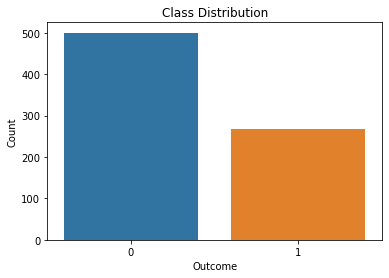

In [10]:
# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['Outcome'])
plt.title('Class Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

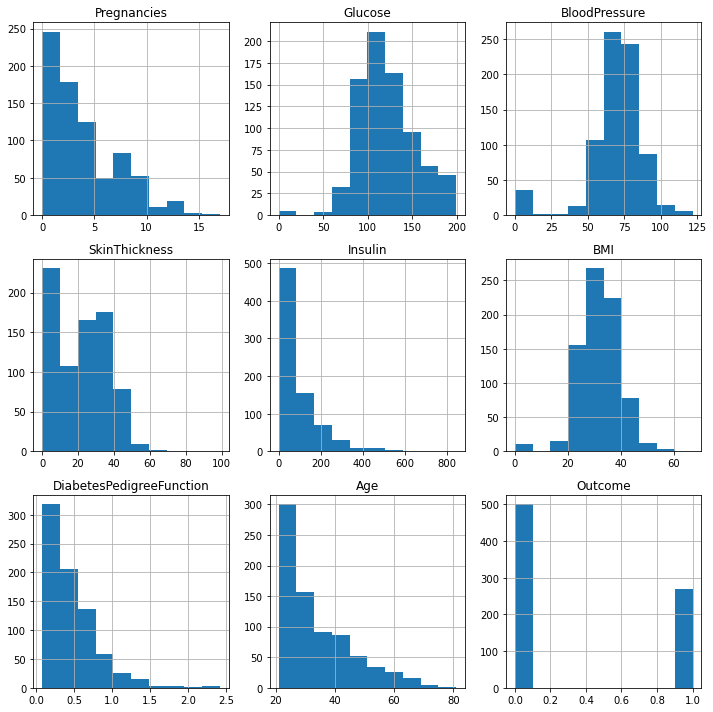

In [11]:
# Feature Distributions
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

In [12]:
# Feature Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

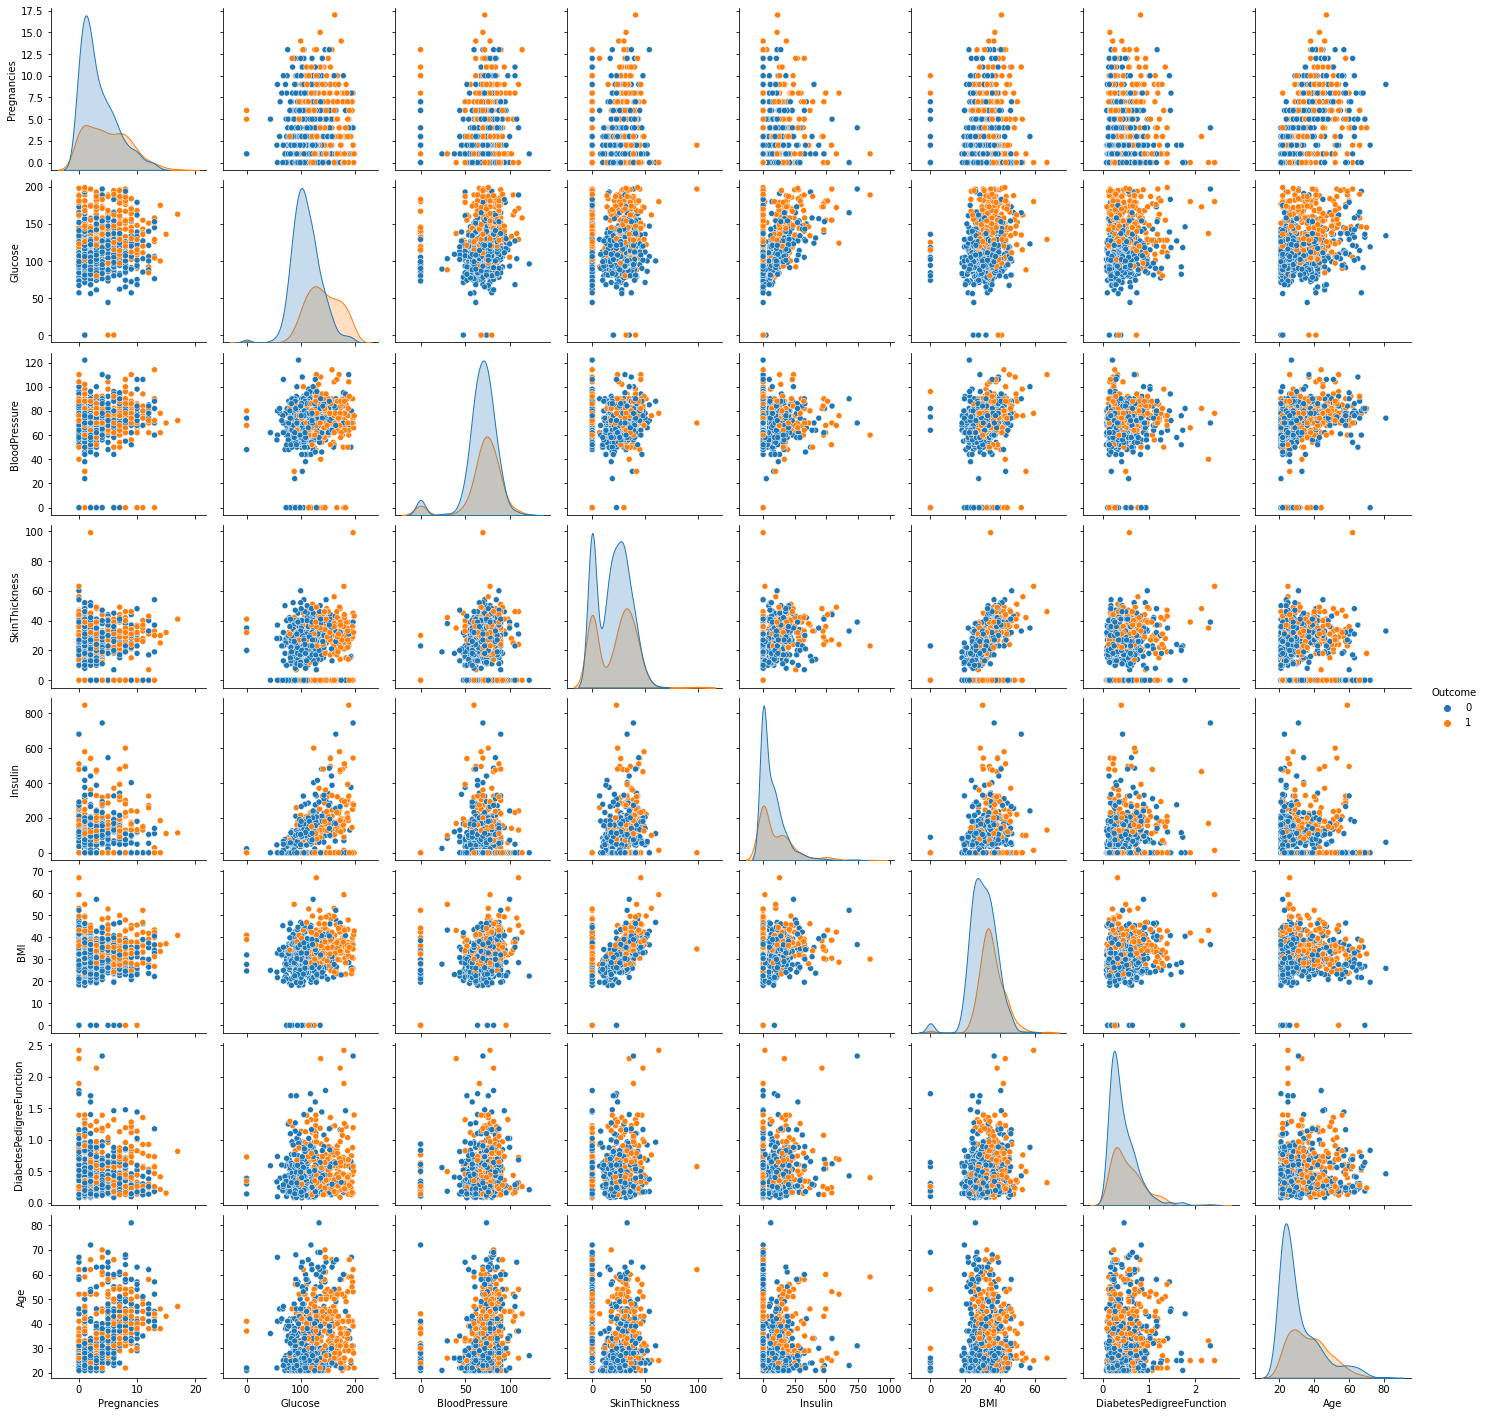

In [13]:
# Pairwise Feature Relationships
sns.pairplot(data, hue='Outcome')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

feature_importance = model.feature_importances_
plt.barh(features.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

NameError: name 'features' is not defined

In [ ]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X.shape

In [ ]:
print(X)

## Model Building

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier (verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test) 
print(models)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
dy_model = LogisticRegression()

# Train the model on the training data
dy_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dy_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


C:\Users\Mohammed Kayser\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[78 21]
 [18 37]]


## PREDICT DAIBETES

In [ ]:
# Create a function to take user inputs and make predictions
def predict_disease_risk(model):
    # Create an empty dictionary to store user inputs
    user_inputs = {}

    # Iterate through each feature column and get user inputs
    for feature in X.columns:
        user_input = input(f"Enter the value for {feature}: ")
        # Convert the user input to the appropriate data type
        user_inputs[feature] = float(user_input)

    # Create a DataFrame from the user inputs
    user_data = pd.DataFrame([user_inputs])

    # Make predictions on the user data using the trained model
    risk_prediction = model.predict(user_data)

    # Display the predicted disease risk
    print("Predicted Disease Risk: ", risk_prediction)

# Call the function to make predictions with user inputs
predict_disease_risk(model)


In [ ]:
1	85	66	29	0	26.60	0.35	31	0

## DAIBETES PREDICTION APP

In [ ]:
import gradio as gr

# Create a function to make predictions with the model
def predict_diagnosis(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    # Create a dictionary of the user inputs
    user_inputs = {
        'Pregnancies': (Pregnancies),
        'Glucose':(Glucose),
        'BloodPressure': (BloodPressure),
        'SkinThickness':(SkinThickness),
        'Insulin': (Insulin),
        'BMI': (BMI),
        'DiabetesPedigreeFunction': (DiabetesPedigreeFunction),
        'Age': (Age)
    }

    # Create a DataFrame from the user inputs
    user_data = pd.DataFrame([user_inputs])

    # Make predictions on the user data using the trained model
    diagnosis_prediction = model.predict(user_data)

    # Display the predicted diagnosis
    if diagnosis_prediction[0] == 1:
        return "YES"
    else:
        return "NO"

# Create a Gradio interface
iface = gr.Interface(fn=predict_diagnosis, 
                     inputs=["number", "number", "number", "number", "number", "number", "number", "number"], 
                     outputs="text",
                     title="Diabetes Prediction",
                     description="Enter the values for each feature to predict the diagnosis.")

# Launch the interface
iface.launch()


In [ ]:
6	148	72	35	0	33.60	0.63	50

In [19]:
import pickle

# Save the model as a pickle file
with open("dy_model.pkl", "wb") as f:
    pickle.dump(dy_model, f)